In [7]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import tensorflow as tf
tf.__version__

'2.2.0'

In [0]:
!pip install wget

In [0]:
image_path = "/content/drive/My Drive/BT_ML/images.jpeg"

In [0]:
import cv2

In [134]:
image = cv2.imread(image_path)
image = cv2.resize(image, (300, 300))
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray.shape

(300, 300)

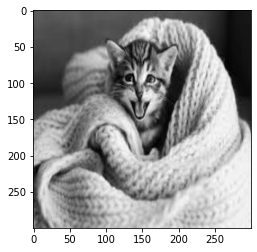

In [135]:
import matplotlib.pyplot as plt
plt.gray()
plt.imshow(gray_image)

In [0]:
kernel_sobelX = [[1, 0, -1], [1, 0, -1], [1, 0, -1]]

In [0]:
kernel_sobelY = [[1, 1, 1], [0, 0, 0], [-1, -1, -1]]

In [0]:
def getCoord(kernel):
  center_filter = [1, 1]
  xRows = [-1, 0, 1, -1, 1, -1, 0, 1]
  yCols = [-1, -1, -1, 0, 0, 1, 1, 1]

  for k in range(8):
    pixel_in_filter_x = center_filter[0] + xRows[k]
    pixel_in_filter_y = center_filter[1] + yCols[k]
    print("Cor ({}, {}) - value: {}".format(pixel_in_filter_x, pixel_in_filter_y, kernel[pixel_in_filter_x][pixel_in_filter_y]))

In [128]:
getCoord(kernel_sobelX)

Cor (0, 0) - value: 1
Cor (1, 0) - value: 1
Cor (2, 0) - value: 1
Cor (0, 1) - value: 0
Cor (2, 1) - value: 0
Cor (0, 2) - value: -1
Cor (1, 2) - value: -1
Cor (2, 2) - value: -1


In [121]:
getCoord(kernel_sobelY)

Cor (0, 0) - value: 1
Cor (1, 0) - value: 0
Cor (2, 0) - value: -1
Cor (0, 1) - value: 1
Cor (2, 1) - value: -1
Cor (0, 2) - value: 1
Cor (1, 2) - value: 0
Cor (2, 2) - value: -1


In [0]:
import numpy as np

def conv(gray_image, kernel):
  image_copied = np.copy(gray_image)
  height = image_copied.shape[0]
  width = image_copied.shape[1]
  print("Size image:", (height, width))


  for h in range(1, height - 1):
    for w in range(1, width - 1):
      center_pixel = [h, w]
      center_filter = [1, 1]
      xRows = [-1, 0, 1, -1, 1, -1, 0, 1]
      yCols = [-1, -1, -1, 0, 0, 1, 1, 1]

      new_value = 0.0

      for k in range(8):
        # item = [xRows[k], yCols[k]]
        pixel_in_kernel_filter_x = center_filter[0] + xRows[k]
        pixel_in_kernel_filter_y = center_filter[1] + yCols[k]
        pixel_in_image_x = center_pixel[0] + xRows[k]
        pixel_in_image_y = center_pixel[1] + yCols[k]

        # print(pixel_in_image_x, pixel_in_image_y)
        new_value = new_value + (gray_image[pixel_in_image_x][pixel_in_image_y] * kernel[pixel_in_kernel_filter_x][pixel_in_kernel_filter_y])

      new_value = new_value + gray_image[h, w] * kernel[1][1]

      if new_value < 0:
        new_value = 0
      if new_value > 255:
        new_value = 255
      # print(new_value)

      image_copied[h, w] = new_value * 1

  return image_copied

In [136]:
result = conv(gray_image, kernel_sobelX)

Size image: (300, 300)


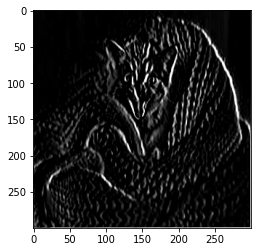

In [137]:
plt.imshow(result)

In [138]:
result1 = conv(gray_image, kernel_sobelY)

Size image: (300, 300)


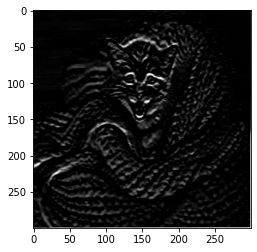

In [139]:
plt.imshow(result1)